# 岭回归 Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_model(algo, x, y):
    x_min, x_max = x.min(axis=0), x.max(axis=0)
    y_min, y_max = y.min(), y.max()
    
    cx = np.linspace(1.05*x_min-0.05*x_max, 1.05*x_max-0.05*x_min, 101)
    cy = algo.predict(cx.reshape(-1, 1))
    
    plt.scatter(x, y)
    plt.plot(cx, cy)
    
    x_lim1, x_lim2 = 1.1*x_min-0.1*x_max, 1.1*x_max-0.1*x_min
    y_lim1, y_lim2 = 1.1*y_min-0.1*y_max, 1.1*y_max-0.1*y_min
    plt.axis([x_lim1, x_lim2, y_lim1, y_lim2])
    plt.show()

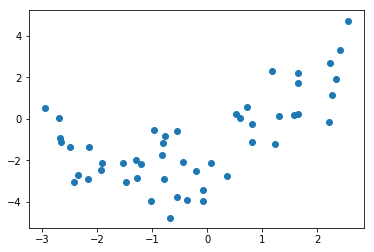

In [3]:
x = np.random.uniform(-3, 3, 50)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x - 2 + np.random.normal(0, 1, 50)

plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

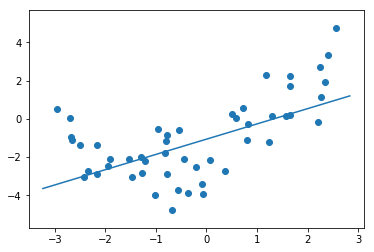

0.22845295527519072

In [6]:
reg1 = PolynomialRegression(1)
reg1.fit(X_train, y_train)
plot_model(reg1, x, y)
reg1.score(X_test, y_test)

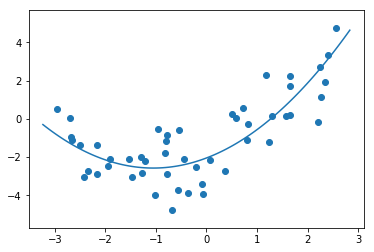

0.7645323323680745

In [7]:
reg2 = PolynomialRegression(2)
reg2.fit(X_train, y_train)
plot_model(reg2, x, y)
reg2.score(X_test, y_test)

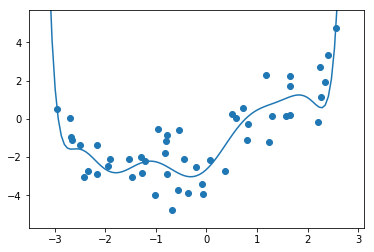

0.45292378689911433

In [8]:
reg10 = PolynomialRegression(10)
reg10.fit(X_train, y_train)
plot_model(reg10, x, y)
reg10.score(X_test, y_test)

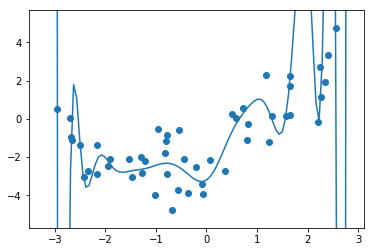

-9.5212232198412696

In [9]:
reg20 = PolynomialRegression(20)
reg20.fit(X_train, y_train)
plot_model(reg20, x, y)
reg20.score(X_test, y_test)

#### 使用岭回归

In [10]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge", Ridge(alpha=alpha))
    ])

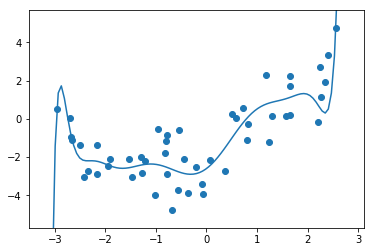

0.40634100569045162

In [11]:
reg20_1 = RidgeRegression(20, 0.0001)
reg20_1.fit(X_train, y_train)
plot_model(reg20_1, x, y)
reg20_1.score(X_test, y_test)

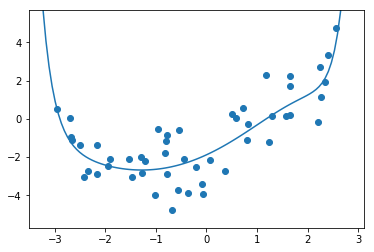

0.75503859499503245

In [12]:
reg20_2 = RidgeRegression(20, 1)
reg20_2.fit(X_train, y_train)
plot_model(reg20_2, x, y)
reg20_2.score(X_test, y_test)

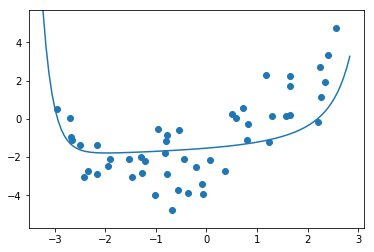

0.40077769210940317

In [13]:
reg20_3 = RidgeRegression(20, 100)
reg20_3.fit(X_train, y_train)
plot_model(reg20_3, x, y)
reg20_3.score(X_test, y_test)

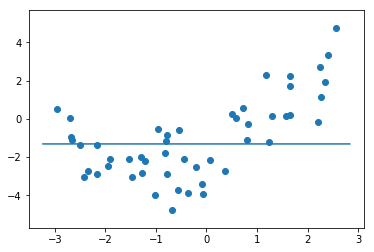

-0.51309548273502359

In [14]:
reg20_4 = RidgeRegression(20, 100000000)
reg20_4.fit(X_train, y_train)
plot_model(reg20_4, x, y)
reg20_4.score(X_test, y_test)